## Figures for charm jet energy-energy correlator

Data for each figure is read from csv files in my github which you can access with these urls defined below. These urls either have a histogram or graph format. The histogram files have the following format:

     bincenter, binwidth, line #1 central value, line #1 error, line #2 central value, line #2 error, ...

Graph csv files have the format:

     x-value, y-value

In [11]:
import sys
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [12]:
pt_lo = [5, 10, 20]
pt_hi = [10, 20, 30]
eta_lo = [-3.5, -1, 1]
eta_hi = [-1, 1, 3.5]

colors = ["g", "b", "m"]
light_colors = ["lightgreen", "lightblue", "plum"]

# figures
pythia8_inclusive = "https://raw.githubusercontent.com/devereauxk/eic_sim_projects/master/charm_eec/analysis/ep_10_100_pythia8_inclusive/"
pythia8_D0injet = "https://raw.githubusercontent.com/devereauxk/eic_sim_projects/master/charm_eec/analysis/ep_10_100_pythia8_D0injet/"
pythia8_D0inpair = "https://raw.githubusercontent.com/devereauxk/eic_sim_projects/master/charm_eec/analysis/ep_10_100_pythia8_D0inpair/"


/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


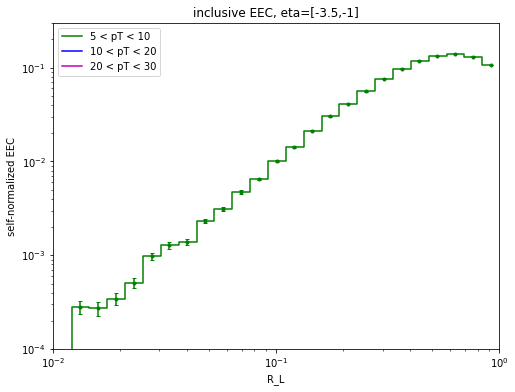

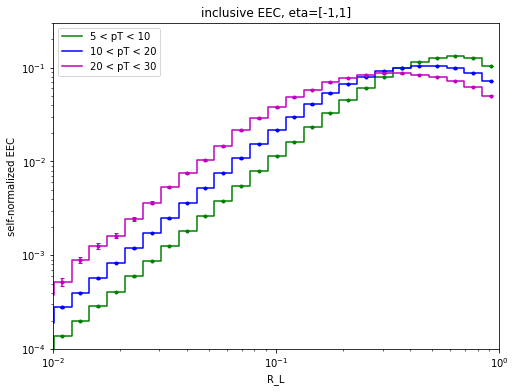

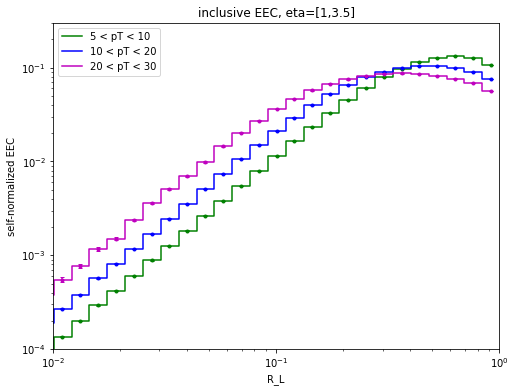

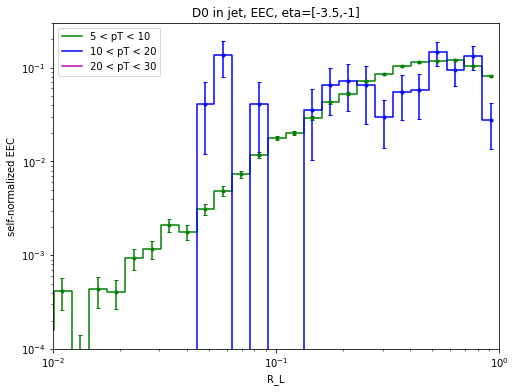

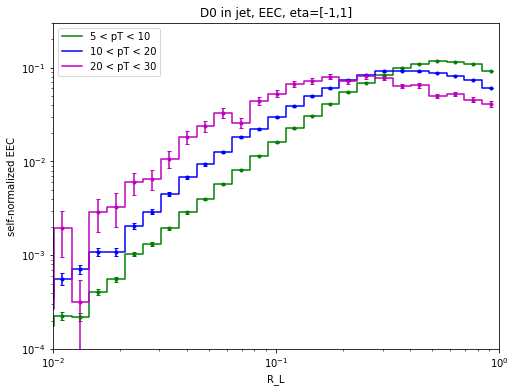

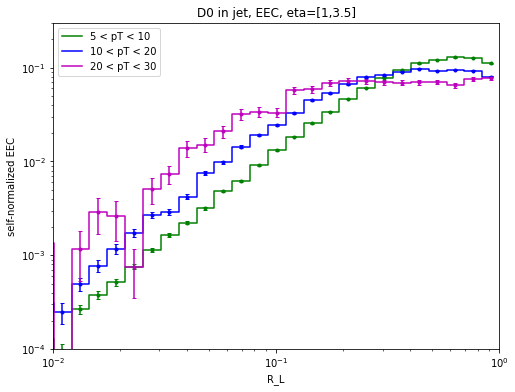

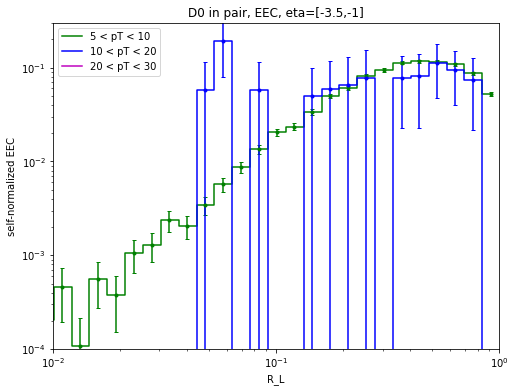

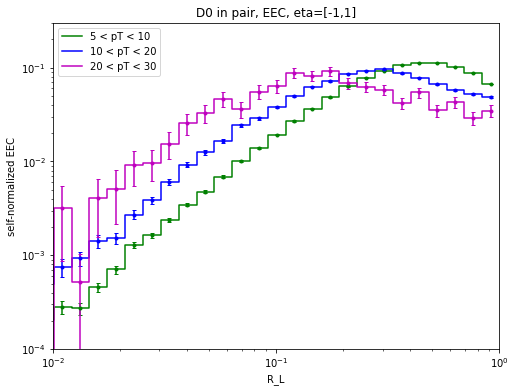

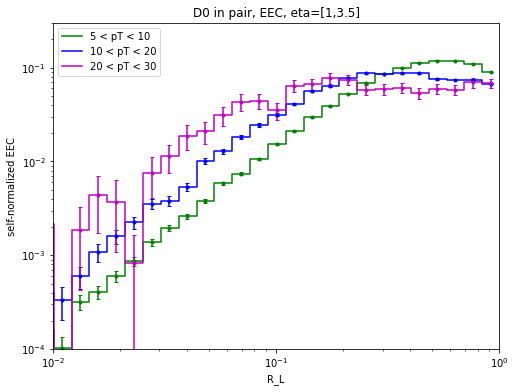

In [27]:
# self-normalized charm jet eec

# inclusive in jet

inclusive_eec = []
inclusive_eec_err = []
for ieta in range(len(eta_lo)):
  data = np.loadtxt(pythia8_inclusive + "eec_overlay_"+str(ieta)+".csv", delimiter=",", dtype=float)
  [bincenter, binwidth, pt0, pt0_err, pt1, pt1_err, pt2, pt2_err] = np.transpose(data)
  inclusive_eec.append([pt0, pt1, pt2])
  inclusive_eec_err.append([pt0_err, pt1_err, pt2_err])
  bin_lo = np.array(bincenter) - 0.5*np.array(binwidth)
  bin_hi = np.array(bincenter) + 0.5*np.array(binwidth)

  plt.rcParams["figure.figsize"] = [8, 6]
  plt.title("inclusive EEC, eta=["+str(eta_lo[ieta])+","+str(eta_hi[ieta])+"]")
  plt.xlabel("R_L")
  plt.ylabel("self-normalized EEC")
  plt.xscale('log')
  plt.yscale('log')
  plt.xlim(1E-2, 1)
  plt.ylim(1E-4, 3E-1)
  for ipt in range(len(pt_lo)):
    plt.step(bincenter, inclusive_eec[ieta][ipt], where='mid', color=colors[ipt], label=str(pt_lo[ipt]) + " < pT < " + str(pt_hi[ipt]))
    plt.errorbar(bincenter, inclusive_eec[ieta][ipt], yerr=inclusive_eec_err[ieta][ipt], capsize=2, fmt='.', color=colors[ipt])
  plt.legend(loc='upper left')
  plt.show()

# D0 in jet
D0injet_eec = []
D0injet_eec_err = []
for ieta in range(len(eta_lo)):
  data = np.loadtxt(pythia8_D0injet + "eec_overlay_"+str(ieta)+".csv", delimiter=",", dtype=float)
  [bincenter, binwidth, pt0, pt0_err, pt1, pt1_err, pt2, pt2_err] = np.transpose(data)
  D0injet_eec.append([pt0, pt1, pt2])
  D0injet_eec_err.append([pt0_err, pt1_err, pt2_err])

  plt.rcParams["figure.figsize"] = [8, 6]
  plt.title("D0 in jet, EEC, eta=["+str(eta_lo[ieta])+","+str(eta_hi[ieta])+"]")
  plt.xlabel("R_L")
  plt.ylabel("self-normalized EEC")
  plt.xscale('log')
  plt.yscale('log')
  plt.xlim(1E-2, 1)
  plt.ylim(1E-4, 3E-1)
  for ipt in range(len(pt_lo)):
    plt.step(bincenter, D0injet_eec[ieta][ipt], where='mid', color=colors[ipt], label=str(pt_lo[ipt]) + " < pT < " + str(pt_hi[ipt]))
    plt.errorbar(bincenter, D0injet_eec[ieta][ipt], yerr=D0injet_eec_err[ieta][ipt], capsize=2, fmt='.', color=colors[ipt])
  plt.legend(loc='upper left')
  plt.show()

# D0 in pair
D0inpair_eec = []
D0inpair_eec_err = []
for ieta in range(len(eta_lo)):
  data = np.loadtxt(pythia8_D0inpair + "eec_overlay_"+str(ieta)+".csv", delimiter=",", dtype=float)
  [bincenter, binwidth, pt0, pt0_err, pt1, pt1_err, pt2, pt2_err] = np.transpose(data)
  D0inpair_eec.append([pt0, pt1, pt2])
  D0inpair_eec_err.append([pt0_err, pt1_err, pt2_err])

  plt.rcParams["figure.figsize"] = [8, 6]
  plt.title("D0 in pair, EEC, eta=["+str(eta_lo[ieta])+","+str(eta_hi[ieta])+"]")
  plt.xlabel("R_L")
  plt.ylabel("self-normalized EEC")
  plt.xscale('log')
  plt.yscale('log')
  plt.xlim(1E-2, 1)
  plt.ylim(1E-4, 3E-1)
  for ipt in range(len(pt_lo)):
    plt.step(bincenter, D0inpair_eec[ieta][ipt], where='mid', color=colors[ipt], label=str(pt_lo[ipt]) + " < pT < " + str(pt_hi[ipt]))
    plt.errorbar(bincenter, D0inpair_eec[ieta][ipt], yerr=D0inpair_eec_err[ieta][ipt], capsize=2, fmt='.', color=colors[ipt])
  plt.legend(loc='upper left')
  plt.show()


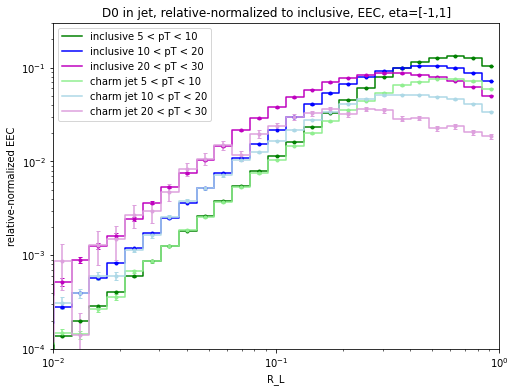

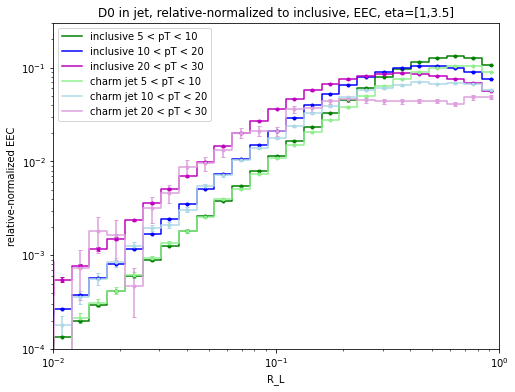

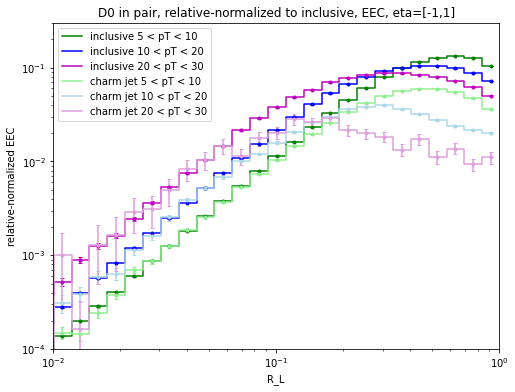

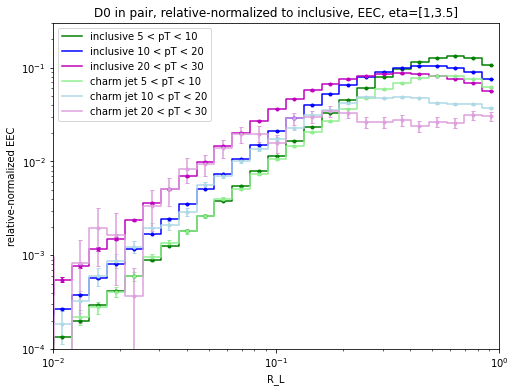

In [30]:
# charm jet EEC relative-normalized to inclusive
rl_norm_lo = 1E-4
rl_norm_hi = 0.05


def hist_integral(bincenter, binwidth, y, a=None, b=None):
  integral = 0

  assert len(bincenter) == len(binwidth) and len(bincenter) == len(y)

  if a == None:
    a = bincenter[0] - 2*binwidth[0]
  if b == None:
    b = bincenter[len(bincenter)+1] + 2*binwidth[len(bincenter)+1]

  for ibin in range(len(bincenter)):
    if bincenter[ibin] >= a and bincenter[ibin] <= b:
      integral += binwidth[ibin] * y[ibin]

  return integral


# D0 in jet
D0injet_eec_relnorm = [None]
D0injet_eec_relnorm_err = [None]
for ieta in range(1,len(eta_lo)):
  this_eta = []
  this_eta_err = []
  for ipt in range(len(D0injet_eec)):
    relative_normalization = hist_integral(bincenter, binwidth, inclusive_eec[ieta][ipt], rl_norm_lo, rl_norm_hi) / hist_integral(bincenter, binwidth, D0injet_eec[ieta][ipt], rl_norm_lo, rl_norm_hi)
    this_eta.append(D0injet_eec[ieta][ipt] * relative_normalization)
    this_eta_err.append(D0injet_eec_err[ieta][ipt] * relative_normalization)
  D0injet_eec_relnorm.append(this_eta)
  D0injet_eec_relnorm_err.append(this_eta_err)

  plt.rcParams["figure.figsize"] = [8, 6]
  plt.title("D0 in jet, relative-normalized to inclusive, EEC, eta=["+str(eta_lo[ieta])+","+str(eta_hi[ieta])+"]")
  plt.xlabel("R_L")
  plt.ylabel("relative-normalized EEC")
  plt.xscale('log')
  plt.yscale('log')
  plt.xlim(1E-2, 1)
  plt.ylim(1E-4, 3E-1)
  for ipt in range(len(pt_lo)):
    plt.step(bincenter, inclusive_eec[ieta][ipt], where='mid', color=colors[ipt], label="inclusive " + str(pt_lo[ipt]) + " < pT < " + str(pt_hi[ipt]))
    plt.errorbar(bincenter, inclusive_eec[ieta][ipt], yerr=inclusive_eec_err[ieta][ipt], capsize=2, fmt='.', color=colors[ipt])
  for ipt in range(len(pt_lo)):
    plt.step(bincenter, D0injet_eec_relnorm[ieta][ipt], where='mid', color=light_colors[ipt], label="charm jet " + str(pt_lo[ipt]) + " < pT < " + str(pt_hi[ipt]))
    plt.errorbar(bincenter, D0injet_eec_relnorm[ieta][ipt], yerr=D0injet_eec_relnorm_err[ieta][ipt], capsize=2, fmt='.', color=light_colors[ipt])
  plt.legend(loc='upper left')
  plt.show()

# D0 in pair
D0inpair_eec_relnorm = [None]
D0inpair_eec_relnorm_err = [None]
for ieta in range(1,len(eta_lo)):
  this_eta = []
  this_eta_err = []
  for ipt in range(len(D0injet_eec)):
    relative_normalization = hist_integral(bincenter, binwidth, inclusive_eec[ieta][ipt], rl_norm_lo, rl_norm_hi) / hist_integral(bincenter, binwidth, D0inpair_eec[ieta][ipt], rl_norm_lo, rl_norm_hi)
    this_eta.append(D0inpair_eec[ieta][ipt] * relative_normalization)
    this_eta_err.append(D0inpair_eec_err[ieta][ipt] * relative_normalization)
  D0inpair_eec_relnorm.append(this_eta)
  D0inpair_eec_relnorm_err.append(this_eta_err)

  plt.rcParams["figure.figsize"] = [8, 6]
  plt.title("D0 in pair, relative-normalized to inclusive, EEC, eta=["+str(eta_lo[ieta])+","+str(eta_hi[ieta])+"]")
  plt.xlabel("R_L")
  plt.ylabel("relative-normalized EEC")
  plt.xscale('log')
  plt.yscale('log')
  plt.xlim(1E-2, 1)
  plt.ylim(1E-4, 3E-1)
  for ipt in range(len(pt_lo)):
    plt.step(bincenter, inclusive_eec[ieta][ipt], where='mid', color=colors[ipt], label="inclusive " + str(pt_lo[ipt]) + " < pT < " + str(pt_hi[ipt]))
    plt.errorbar(bincenter, inclusive_eec[ieta][ipt], yerr=inclusive_eec_err[ieta][ipt], capsize=2, fmt='.', color=colors[ipt])
  for ipt in range(len(pt_lo)):
    plt.step(bincenter, D0inpair_eec_relnorm[ieta][ipt], where='mid', color=light_colors[ipt], label="charm jet " + str(pt_lo[ipt]) + " < pT < " + str(pt_hi[ipt]))
    plt.errorbar(bincenter, D0inpair_eec_relnorm[ieta][ipt], yerr=D0inpair_eec_relnorm_err[ieta][ipt], capsize=2, fmt='.', color=light_colors[ipt])
  plt.legend(loc='upper left')
  plt.show()



<ipython-input-50-95c1091f32b9>:13: RuntimeWarning: invalid value encountered in true_divide
  this_eta.append(D0injet_eec_relnorm[ieta][ipt] / inclusive_eec[ieta][ipt])
<ipython-input-50-95c1091f32b9>:4: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt((a_err / b)**2)


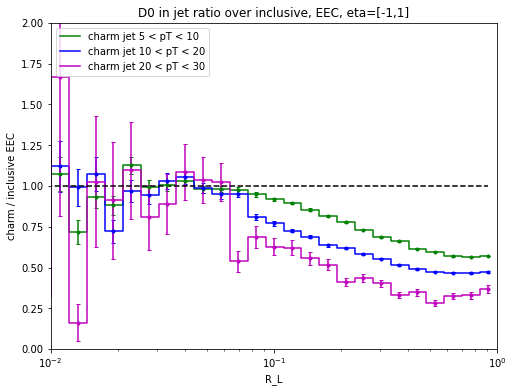

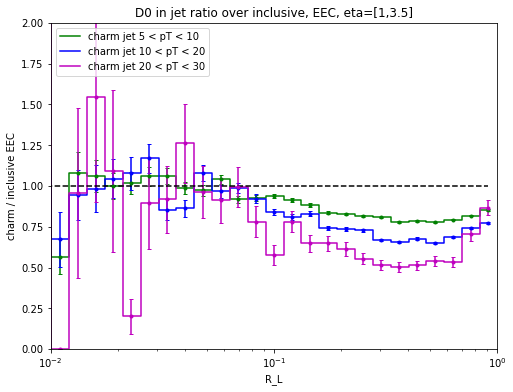

<ipython-input-50-95c1091f32b9>:39: RuntimeWarning: invalid value encountered in true_divide
  this_eta.append(D0inpair_eec_relnorm[ieta][ipt] / inclusive_eec[ieta][ipt])


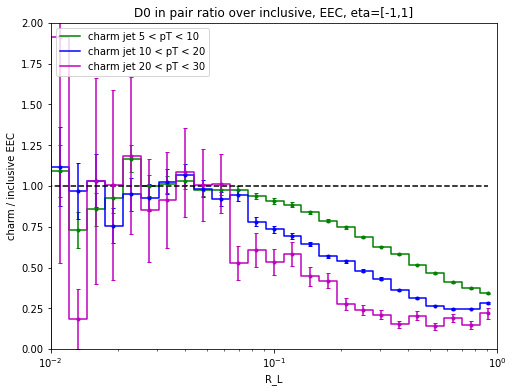

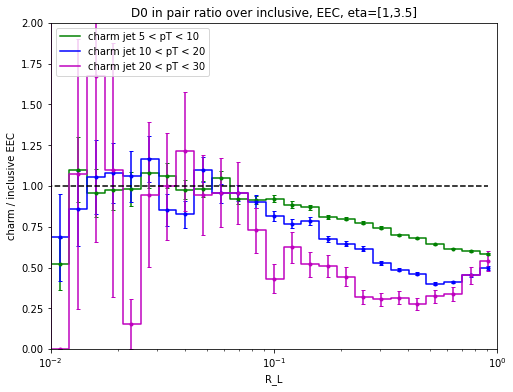

In [50]:
# [charm jet / inclusive] EEC ratio, charm relatively normalized

def ratio_err(a, b, a_err, b_err):
  return np.sqrt((a_err / b)**2)

# D0 in jet
D0injet_eec_ratio = [None]
D0injet_eec_ratio_err = [None]
for ieta in range(1,len(eta_lo)):
  this_eta = []
  this_eta_err = []
  for ipt in range(len(pt_lo)):
    this_eta.append(D0injet_eec_relnorm[ieta][ipt] / inclusive_eec[ieta][ipt])
    this_eta_err.append(ratio_err(D0injet_eec_relnorm[ieta][ipt], inclusive_eec[ieta][ipt], D0injet_eec_relnorm_err[ieta][ipt], inclusive_eec_err[ieta][ipt]))
  D0injet_eec_ratio.append(this_eta)
  D0injet_eec_ratio_err.append(this_eta_err)

  plt.rcParams["figure.figsize"] = [8, 6]
  plt.title("D0 in jet ratio over inclusive, EEC, eta=["+str(eta_lo[ieta])+","+str(eta_hi[ieta])+"]")
  plt.xlabel("R_L")
  plt.ylabel("charm / inclusive EEC")
  plt.xscale('log')
  plt.xlim(1E-2, 1)
  plt.ylim(0, 2)
  for ipt in range(len(pt_lo)):
    plt.step(bincenter, D0injet_eec_ratio[ieta][ipt], where='mid', color=colors[ipt], label="charm jet " + str(pt_lo[ipt]) + " < pT < " + str(pt_hi[ipt]))
    plt.errorbar(bincenter, D0injet_eec_ratio[ieta][ipt], yerr=D0injet_eec_ratio_err[ieta][ipt], capsize=2, fmt='.', color=colors[ipt])
  plt.plot(bincenter, [1 for i in range(len(bincenter))], '--', color='black')
  plt.legend(loc='upper left')
  plt.show()

# D0 in pair
D0inpair_eec_ratio = [None]
D0inpair_eec_ratio_err = [None]
for ieta in range(1,len(eta_lo)):
  this_eta = []
  this_eta_err = []
  for ipt in range(len(pt_lo)):
    this_eta.append(D0inpair_eec_relnorm[ieta][ipt] / inclusive_eec[ieta][ipt])
    this_eta_err.append(ratio_err(D0inpair_eec_relnorm[ieta][ipt], inclusive_eec[ieta][ipt], D0inpair_eec_relnorm_err[ieta][ipt], inclusive_eec_err[ieta][ipt]))
  D0inpair_eec_ratio.append(this_eta)
  D0inpair_eec_ratio_err.append(this_eta_err)

  plt.rcParams["figure.figsize"] = [8, 6]
  plt.title("D0 in pair ratio over inclusive, EEC, eta=["+str(eta_lo[ieta])+","+str(eta_hi[ieta])+"]")
  plt.xlabel("R_L")
  plt.ylabel("charm / inclusive EEC")
  plt.xscale('log')
  plt.xlim(1E-2, 1)
  plt.ylim(0, 2)
  for ipt in range(len(pt_lo)):
    plt.step(bincenter, D0inpair_eec_ratio[ieta][ipt], where='mid', color=colors[ipt], label="charm jet " + str(pt_lo[ipt]) + " < pT < " + str(pt_hi[ipt]))
    plt.errorbar(bincenter, D0inpair_eec_ratio[ieta][ipt], yerr=D0inpair_eec_ratio_err[ieta][ipt], capsize=2, fmt='.', color=colors[ipt])
  plt.plot(bincenter, [1 for i in range(len(bincenter))], '--', color='black')
  plt.legend(loc='upper left')
  plt.show()
